In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dynesty
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pandas

In [2]:
tim, fl, fle = np.loadtxt('kelt-11.dat', usecols=(0,1,2), unpack=True)
dta = {'tim':tim, 'fl':fl, 'fle':fle}
df = pandas.DataFrame(data=dta)

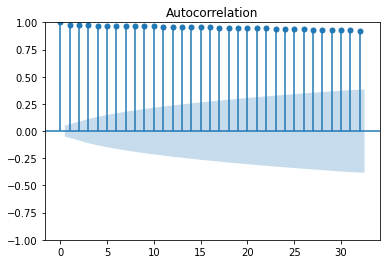

In [3]:
plot_acf(df.fl);

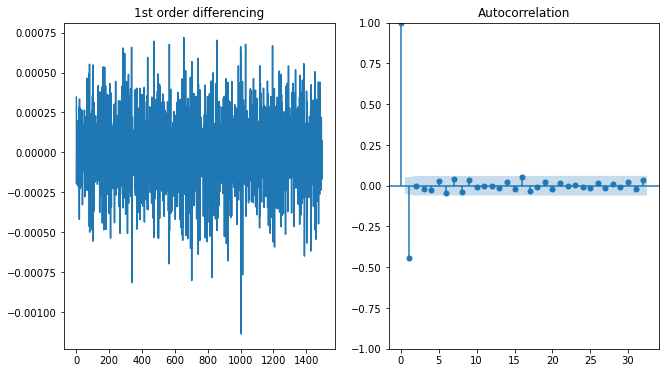

In [4]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.fl.diff())

ax2 = f.add_subplot(122)
plot_acf(df.fl.diff().dropna(), ax=ax2);

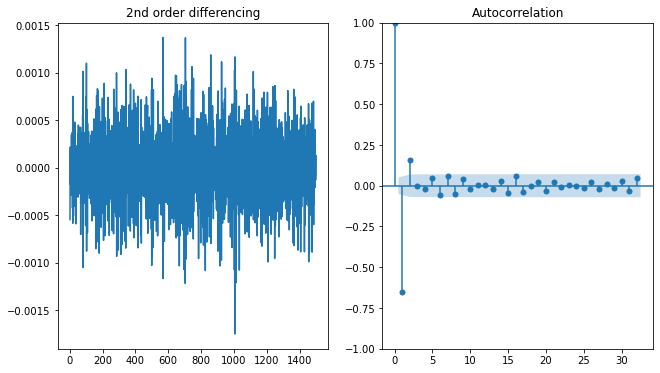

In [5]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.fl.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.fl.diff().diff().dropna(), ax=ax2);

In [6]:
res = adfuller(df.fl.dropna())
print('p-value: ', res[1])

res = adfuller(df.fl.diff().dropna())
print('p-value: ', res[1])

res = adfuller(df.fl.diff().diff().dropna())
print('p-value: ', res[1])

p-value:  0.7163912747970943
p-value:  0.0
p-value:  7.10794214088968e-28


/Users/japa6985/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


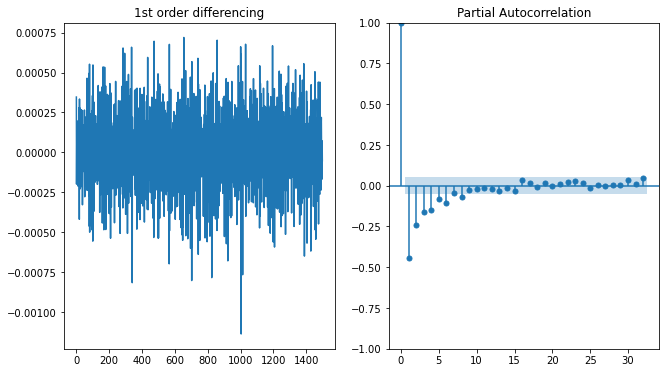

In [7]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.fl.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.fl.diff().dropna(), ax=ax2);

/Users/japa6985/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


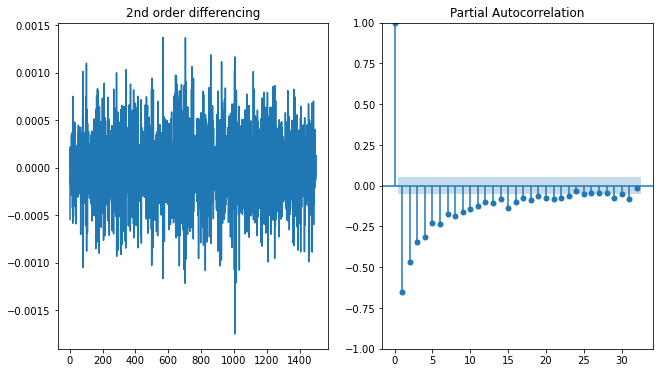

In [8]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.fl.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.fl.diff().diff().dropna(), ax=ax2);

In [15]:
arima_model = ARIMA(df.fl, order=(23,2,23))
model = arima_model.fit()
print(model.summary())

/Users/japa6985/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     fl   No. Observations:                 1499
Model:               ARIMA(23, 2, 23)   Log Likelihood               10604.526
Date:                Thu, 21 Jul 2022   AIC                         -21115.053
Time:                        23:43:55   BIC                         -20865.426
Sample:                             0   HQIC                        -21022.048
                               - 1499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8313      0.010   -183.434      0.000      -1.851      -1.812
ar.L2         -2.4641      0.011   -216.728      0.000      -2.486      -2.442
ar.L3         -2.8490      0.010   -291.465      0.0

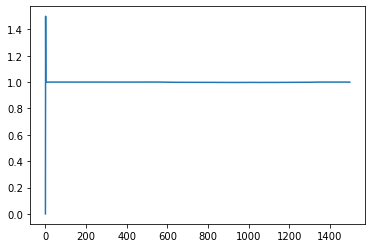

In [16]:
pred = model.predict(dynamic=False)
plt.plot(pred)